## Drill: fixing assumptions

Judging from the diagnostic plots, your data has a problem with both heteroscedasticity and multivariate non-normality.  Use the cell(s) below to see what you can do to fix it.

In [1]:
# Set up environment.
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


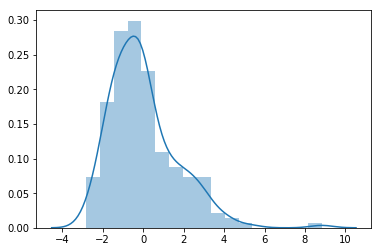

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X, Y)

y_pred = regr.predict(X)
errors = y_pred - Y
sns.distplot(errors)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


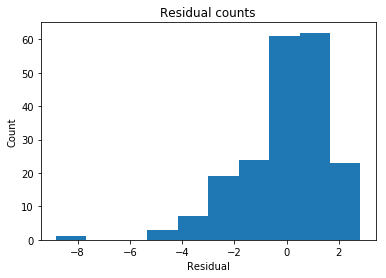

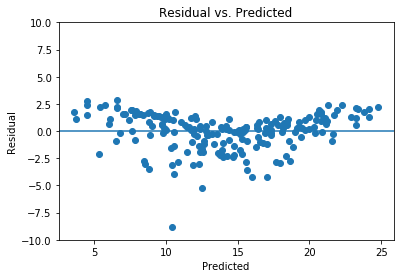

In [3]:
correlation_matrix = X.corr()
display(correlation_matrix)

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
axes.set_ylim([-10, 10])
plt.title('Residual vs. Predicted')
plt.show()

# Hm...looks a bit concerning.

(array([ 2.,  9., 20., 47., 35., 29., 22., 17., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <a list of 10 Patch objects>)

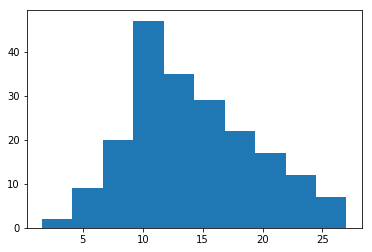

In [4]:
# Fixing multivariate normality.
plt.hist(data['Sales'])

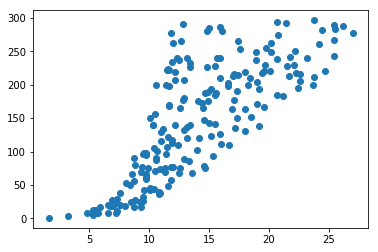

In [5]:
plt.scatter(data['Sales'], data['TV'])

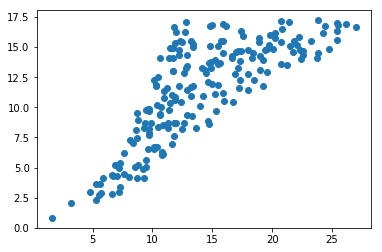

In [6]:
# By taking the square root of the feature, we should be able to get a more linear correlation.
tv_2 = [math.sqrt(x) for x in data['TV']]

plt.scatter(data["Sales"], tv_2)

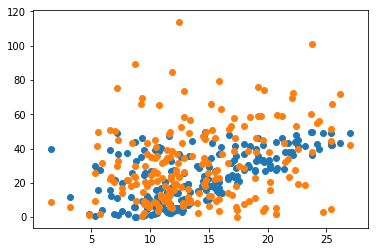

In [7]:
# Repeat for 'Radio' and 'Newspaper' columns.

plt.scatter(data["Sales"], data["Radio"])
plt.scatter(data["Sales"], data["Newspaper"])

In [8]:
data = pd.read_csv(
    "https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv",
    index_col=0
)

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)

tv_2 = [math.sqrt(x) for x in data['TV']]
X = data[['Radio', 'Newspaper']]
X['tv_2'] = tv_2

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.94767873e-01 -5.25277959e-04  9.74947557e-01]]

Intercept: 
 [-1.60927984]

R-squared:
0.9289549053811124


In [9]:
predicted = regr.predict(X).ravel()
actual = data['Sales']
residual = actual - predicted

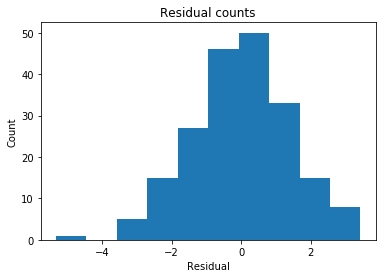

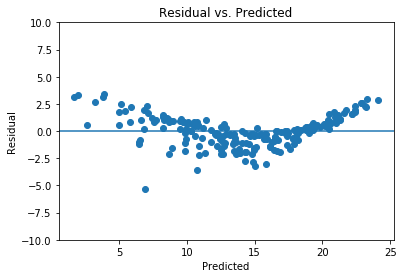

In [10]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.title('Residual vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
axes = plt.gca()
axes.set_ylim([-10, 10])
plt.show()

In [11]:
print(X.corr())

           Radio  Newspaper  tv_2
Radio      1.000      0.354 0.029
Newspaper  0.354      1.000 0.044
tv_2       0.029      0.044 1.000


In [15]:
# Test the model with different holdout groups.
from sklearn.model_selection import train_test_split

# Use train_test_split to create the necessary training and test groups.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(X, Y).score(X, Y)))

With 20% holdout: 0.9363951592577258
Testing on Sample: 0.9289549053811124


In [16]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(regr, X, Y, cv=10)

array([0.90395076, 0.90805533, 0.95748592, 0.93643579, 0.92220388,
       0.91826777, 0.88864244, 0.95936897, 0.87446643, 0.92152617])